In [40]:
import numpy as np
import matplotlib.pyplot as plt
import time

This is a starter notebook for project 2 in TMA4320 Spring 2023. It is recommended that you make sure all code of this notebook runs as expected before you start working on the project. You can then use whatever parts of this notebook you see fit in your final submission. You do not have to use the code as it is handed out, feel free to use it differently.

<h1> Task 1 </h1>

Example of how to define a matrix as an array and calculate its SVD. We pass the `full_matrices = False` argument so that it does not calculate
more entries than necessary.

In [21]:
#1a)

# Create matrix
A1 = np.array([[1000,1],[0,1],[0,0]])
A2=np.array([[1,0,0],[1,0,0],[0,0,1]])

b_1=np.array([2,0,0])
b_2=np.array([1,0,1])
b_3=np.array([0,1,0])

B=np.array([b_1,b_2,b_3])

# Calculate SVD
U_1,S_1,Vt_1 = np.linalg.svd(A1, full_matrices = False)
U_2,S_2,Vt_2 = np.linalg.svd(A2, full_matrices = False)
U_3,S_3,Vt_3 = np.linalg.svd(B, full_matrices = False)


#np.linalg.svd returnerer sigma matrisen som en 1.D array, hvor hvert element i arrayen
# representerer en verdi i diagonalmatrisen. For å kunne bruke matrisemultiplikasjon må vi
# omgjøre arrayen tilbake til en diagonal matrise.

#Omgjøre arrayen til en diagonal matrise.
S_1_diag=np.diag(S_1)

print(fr"Matrise A1:")
print(f"\nMatrisen til U ser ut som følger:")
print(U_1)
print(f"\nMatrisen til S ser ut som følger:")
print(S_1_diag)
print(f"\nMatrisen til V transponert ser ut som følger:")
print(Vt_1)
A_1 = np.dot(U_1,np.dot(S_1_diag,Vt_1))
print(f"\nMatrisen til A1 med  da:")
print(A_1)

#Bruker np.allclose som sammenligner en matrise A med matrise B. Hvis matrisene er tilnærmet lik
# (innenfor en viss tolleranse), vil funksjonen returnere "True". Er de ikke det vil funksjonen 
# returnere false. Setter grensen på 10^(-18) og 10^(-20)

print(f"\nMatrisene er kompitable med en toleranse på 10^(-18): {np.allclose(A1,np.dot(U_1,np.dot(S_1_diag,Vt_1)),atol=1e-18)}")
print(f"Matrisene er kompitable med en toleranse på 10^(-20): {np.allclose(A1,np.dot(U_1,np.dot(S_1_diag,Vt_1)),atol=1e-20)}")

Matrise A1:

Matrisen til U ser ut som følger:
[[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]

Matrisen til S ser ut som følger:
[[1.0000005e+03 0.0000000e+00]
 [0.0000000e+00 9.9999950e-01]]

Matrisen til V transponert ser ut som følger:
[[ 0.9999995  0.001    ]
 [-0.001      0.9999995]]

Matrisen til A1 med  da:
[[ 1.00000000e+03  1.00000000e+00]
 [-2.16840434e-19  1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]]

Matrisene er kompitable med en toleranse på 10^(-18): True
Matrisene er kompitable med en toleranse på 10^(-20): False


Ser at matrisen $A_1 = U_1 \Sigma V^T = \begin{bmatrix} 1000 & 1\\ -2.168 \times 10^{-19} & 1 \\ 0 & 0 \end{bmatrix}$, er nesten helt lik startmatrisen $A_1 = \begin{bmatrix} 1000 & 1\\ 0 & 1 \\ 0 & 0 \end{bmatrix}$. Man har kun fått en ekstremt liten feil i andre rad, første kolonne, pga. datamaskinreprensenterte flyttall. For å rekonstruere $A_1$ er alltid første kolonne i $W_1 = U$ viktigst, dette kan vi lett se i kodeblokken under.

In [22]:
#Lager kopierte variabler for å ikke endre på orginalverdi
U_1_c,S_1_c,Vt_1_c = np.copy(U_1), np.copy(S_1), np.copy(Vt_1)
S_1_c_diag=np.diag(S_1_c)
A1 = np.array([[1000,1],[0,1],[0,0]])

#Lager matrisen X_1 = 
H_1 = np.dot(S_1_c_diag, Vt_1_c)
print( f"H_1 = \n {H_1}") 
print(f"U_1 = \n {U_1_c}")

H_1 = 
 [[ 1.000000e+03  1.000001e+00]
 [-1.000000e-03  9.999990e-01]]
U_1 = 
 [[ 1.e+00 -1.e-06]
 [ 1.e-06  1.e+00]
 [ 0.e+00  0.e+00]]


Når vi multipliserer disse matrisene sammen får man:
$$A_1 = U_1 \left( \Sigma V^T \right) = U_1 H_1 = \begin{bmatrix} u_1 & u_2\\ u_3 & u_4 \\ u_5 & u_6 \end{bmatrix} \cdot \begin{bmatrix} h_1 & h_2\\ h_3 & h_4 \end{bmatrix} = \begin{bmatrix} u_1h_1 + u_2h_3 & u_1h_2 + u_2h_4\\ u_3h_1 + u_4h_3 & u_3h_2 + u_4h_4\\ u_5h_1 + u_6h_3 & u_5h_2 + u_6h_4 \end{bmatrix} = \begin{bmatrix} 1000 & 1\\ 0 & 1 \\ 0 & 0 \end{bmatrix},$$ 
der $\; H_1 = \left( \Sigma V^T \right)$. 


Fra koden over ser man tydelig at $u_1x_1 >> u_2x_3$ og at $\;u_1x_2 >> u_2x_4$, dermed vil den første kolonnen i $W_1 = U_1$ være mye viktigere for å representere de to verdiene i første rad i $A_1$. Derimot for andre rad ser man at $u_4x_4 >> u_3x_2$, så andre kolonne i $W_1$ er viktigere for å bestemme andre rad i $A_1$. Men man kan likevel argumentere for at første rad i $A_1$ representerer den fulle matrisen $A_1$ bedre enn andre kolonne, og dermed vil første kolonne i $W_1$ være viktigst for representasjonen av $A_1$.

For å teste om teorien vår stemmer kan vi sammenligne med  $\textbf{SVD}$ $A_2 = U \Sigma V^T$. 

In [23]:
#1b)
U_2,S_2,Vt_2 = np.linalg.svd(A2, full_matrices = False)
S_2_diag=np.diag(S_2)

print(fr"Matrise A2:")
print(f"\nMatrisen til U ser ut som følger:")
print(U_2)
print(f"\nMatrisen til S ser ut som følger:")
print(S_2_diag)
print(f"\nMatrisen til V transponert ser ut som følger:")
print(Vt_2)
A_2 = np.dot(U_2,np.dot(S_2_diag,Vt_2))
print(f"\nMatrisen til A2 med  da:")
print(A_2)

Matrise A2:

Matrisen til U ser ut som følger:
[[-0.70710678  0.         -0.70710678]
 [-0.70710678  0.          0.70710678]
 [ 0.          1.          0.        ]]

Matrisen til S ser ut som følger:
[[1.41421356 0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         0.        ]]

Matrisen til V transponert ser ut som følger:
[[-1. -0. -0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]

Matrisen til A2 med  da:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


Her kan man se at matrisen $ S = \Sigma\;$ inneholder en $0$-rad. Altså vil tredje basisvektor i $U_2$ inneholde overflødig informasjon om matrisen $A_2$. Man ser dette på kolonne $2$ i $A_2$ der alle elementene nå er lik $0$. Da kan man med sikkerhet bruke redusert $\textbf{SVD}$. En generell formel for å finne den reduserte $\textbf{SVD}$ er gitt ved: $$A_2 = U_d \Sigma_d V^T_d,$$
der $d < 3$. Nedenfor lager man en funksjon for å bruke redusert $\textbf{SVD}$.  

In [24]:
def TruncSVD(U, S, Vt, d):
    S_d = S[:d,:d] #Fjerner pivotelement som er 0, og dens kolonne og rad i matrisen
    U_d = U[:,:d] #Fjerner alle kolonnenr som kan reduseres
    Vt_d = Vt[:d,:] #Fjerner alle rader som kan reduseres
    W = U_d
    H = np.dot(S_d,Vt_d)
    return W, H #Returnerer: W = basisvektorene og H = S*V^T


Funksjonen vil gi oss den reduserte formen til systemet. Man kan teste om dette fungerer som det skal på $A_2$:

In [25]:
W_2, H_2 = TruncSVD(U_2,S_2_diag,Vt_2,2) #Tester med d = 2 siden siste rad er 0
A_2_Trunc = np.dot(W_2, H_2)

print("A_2 uten redusert SVD:")
print(A_2_Trunc)
print("\n A_2 med redusert SVD:")
print(A_2)
print(f"\n Matrisene er kompitable med en toleranse på 10^(-20): {np.allclose(A_2_Trunc, A_2,atol=1e-20)}")

A_2 uten redusert SVD:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

 A_2 med redusert SVD:
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]

 Matrisene er kompitable med en toleranse på 10^(-20): True


Av kode-eksempelet over ser man at man kan fjerne tredje basisvektor i $U_2$ uten at dette har noen som helst betydning for representasjonen av $A_2$. 

Nå skal vi finnne projeksjonen av kolonnevektorene $b_1, b_2$ og $b_3$ ned i vektorrommet $W_1$ og $W_2$: $P_W (b) = W h^* = WW^T b$. 

In [26]:
#1c)

b_1=np.array([2,0,0])
b_2=np.array([1,0,1])
b_3=np.array([0,1,0])
B=np.array([b_1,b_2,b_3])
W_1 = np.copy(U_1)
W2 = np.copy(W_2)

def orthproj(matrix, W):
    W_T = np.transpose(W) #Transponerer W
    P_W = np.dot(W, np.dot(W_T,matrix)) #Regner ut projeksjonen av matrisen
    return P_W

#Projeksjonen av B ned i vektorrommet W_1
P_W1 = orthproj(B,W_1)
print(f"Projeksjonen av B ned i vektorrommet W_1 er: \n {P_W1}")
#Projeksjonen av B ned i vektorrommet W_2
P_W2 = orthproj(B,W_2)
print(f"\nProjeksjonen av B ned i vektorrommet W_2 er: \n {P_W2}")

#Lager funksjon for å finne distansen mellom kollonevektorene i B og basisvektorene i W
def columnDistance(matrix, W):
    P_W = orthproj(matrix,W)    #Finner projeksjonen av matrisen ned i vektorrommet W
    D_W = np.zeros(len(matrix.T))
    for i in range(len(matrix.T)):
        D_W[i] = np.linalg.norm(matrix[:,i]-P_W[:,i]) #Finner distansen
    return D_W

D_W1 = columnDistance(B,W_1)
D_W2 = columnDistance(B,W_2)

print(f"\nDistansen mellom kolonnene i B og basisvektorene i W_1, D_W1 er: \n {D_W1}")
print(f"\nDistansen mellom kolonnene i B og basisvektorene i W_2, D_W2 er: \n {D_W2}")


Projeksjonen av B ned i vektorrommet W_1 er: 
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]

Projeksjonen av B ned i vektorrommet W_2 er: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]

Distansen mellom kolonnene i B og basisvektorene i W_1, D_W1 er: 
 [0.00000000e+00 1.00000000e+00 1.11022302e-16]

Distansen mellom kolonnene i B og basisvektorene i W_2, D_W2 er: 
 [0.70710678 0.         0.70710678]


I kodeblokken over ser man at $D_{W_1} \approx \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}$, der man kun har fått årsmå feil i siste kolonne pga. flyttallsrepresentasjon. Man ser at kolonnevektorene $b_1 = \begin{bmatrix} 2 & 1 & 0 \end{bmatrix}^T $ og $b_3 = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T $ er i projeksjonen av $B$, $P_{W_1}(B) = \begin{bmatrix} 2 & 0 & 0 \\ 1 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}$, og at $b_2 = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T \neq \begin{bmatrix} 0 & 0 & 0 \end{bmatrix}^T$ i projeksjonen. Dermed vil distansen mellom kolonnene være $D_{W_1} = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}$, som man ser stemmer godt overens med den numeriske utregnede verdien. 

For projeksjonen av samme matrise $B$ ned i vektorrommet $W_2$ får man, $ P_{W_2}(B) = \begin{bmatrix} \frac{3}{2} & 0 & \frac{1}{2}  \\ \frac{3}{2} & 0 & \frac{1}{2} \\ 0 & 1 & 0 \end{bmatrix}$. Her ser man at det kun er kolonnevektoren $b_2 = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T$, som er i projeksjonen, der  $b_1 = \begin{bmatrix} 2 & 1 & 0 \end{bmatrix}^T \neq \begin{bmatrix}\frac{3}{2} & \frac{3}{2} & 0 \end{bmatrix}^T$ og $b_3 = \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}^T \neq \begin{bmatrix} \frac{1}{2} & \frac{1}{2} & 0 \end{bmatrix}^T$. Man ser da at distansen mellom disse kolonnevektorene og projeksjonen er like store, og lik $\sqrt{\left(\frac{1}{2}\right)^2+\left(\frac{1}{2}\right)^2} = \frac{\sqrt{2}}{2} \approx 0.70710678$. Dette stemmer også utmerket med de numeriske verdiene,  $D_{W_2} = \begin{bmatrix} 0.70710678 & 0 & 0.70710678 \end{bmatrix}$.


Vi skal nå teste ENMF metoden.

In [27]:
def nnproj(matrix, W_plus, maxIter, delta):
    #print(f'A.shape = {matrix.shape}')
    W_T = np.transpose(W_plus)
    (row, col) = W_plus.shape[1], matrix.shape[1]
    H = np.random.uniform(0,1, (row,col))
    #print(f'H.shape = {H.shape}')
    B = np.dot(W_T, matrix)              #Kalkulerer dette her utenfor løkka
    #print(f'B.shape = {B.shape}')
    C = np.dot(W_T, W_plus)
    for k in range(maxIter):
        H_copy = np.copy(H)
        H = np.multiply(H_copy,B)/(np.dot(C,H_copy) + delta)
    nnP_W = np.dot(W_plus, H)
    return nnP_W, H

#Gjenbruker all kode fra funksjon over men endrer på parametre, og projeksjonstype
def nncolumnDistance(matrix, W_plus, maxIter, delta):
    P_W, H = nnproj(matrix,W_plus, maxIter, delta)      #Finner projeksjonen av matrisen ned i vektorrommet W_plus
    D_W = np.zeros(len(matrix.T))
    for i in range(len(matrix.T)):
        D_W[i] = np.linalg.norm(matrix[:,i]-P_W[:,i]) #Finner distansen
    return D_W

#Tar tiden på koden
start_t = time.time() 

nnP_A1, H1 = nnproj(B,A1,1000,1e-10)
nnP_A2, H2 = nnproj(B,A2,1000,1e-10)

print(f"Den ikke negative projeksjonen av B ned i vektorrommet A_1 er: \n {nnP_A1}")
print(f"Den ortogonale projeksjonen av B ned i vektorrommet W_1 er: \n {orthproj(B, W_1)}")
print(f"Vekten H_1 etter iterasjonene er: \n {H1}")

print(f"\nDen ikke negative projeksjonen av B ned i vektorrommet A_2 er: \n {nnP_A2}")
print(f"Den ortogonale projeksjonen av B ned i vektorrommet W_2 er: \n {orthproj(B, W_2)}")
print(f"Vekten H_2 etter iterasjonene er: \n {H2}")

nnD_A1 = nncolumnDistance(B,A1, 1000, 1e-10)
nnD_A2 =  nncolumnDistance(B,A2, 1000, 1e-10)

print(f"\nDistansen mellom kolonnene i B og basisvektorene i A_1, D_A1 er: \n {nnD_A1}")
print(f"\nDistansen mellom kolonnene i B og basisvektorene i A_2, D_A2 er: \n {nnD_A2}")

kjøretid = time.time() - start_t
print(f"\nProgrammet brukte {np.round(kjøretid,4)} sekunder på å kjøre")
 

Den ikke negative projeksjonen av B ned i vektorrommet A_1 er: 
 [[2.  0.  0.5]
 [1.  0.  0.5]
 [0.  0.  0. ]]
Den ortogonale projeksjonen av B ned i vektorrommet W_1 er: 
 [[2. 0. 0.]
 [1. 0. 1.]
 [0. 0. 0.]]
Vekten H_1 etter iterasjonene er: 
 [[0.001 0.    0.   ]
 [1.    0.    0.5  ]]

Den ikke negative projeksjonen av B ned i vektorrommet A_2 er: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]
Den ortogonale projeksjonen av B ned i vektorrommet W_2 er: 
 [[1.5 0.  0.5]
 [1.5 0.  0.5]
 [0.  1.  0. ]]
Vekten H_2 etter iterasjonene er: 
 [[1.5 0.  0.5]
 [0.  0.  0. ]
 [0.  1.  0. ]]

Distansen mellom kolonnene i B og basisvektorene i A_1, D_A1 er: 
 [9.99002492e-11 1.00000000e+00 7.07106781e-01]

Distansen mellom kolonnene i B og basisvektorene i A_2, D_A2 er: 
 [7.07106781e-01 1.00000008e-10 7.07106781e-01]

Programmet brukte 0.0703 sekunder på å kjøre


Som man ser her er det forskjell på den ikke negative projeksjonen og den ortogonale projeksjonen for matrisen $A_1$, men for matrisen $A_2$ er både ortogonal og ikke negativ projeksjon akkurat den samme. Man ser at den numeriske feilen nå avhenger hovedsaklig av antallet iterasjoner, men også litt av størrelsen på $\delta$. Ved kun $50$ iterasjoner er projeksjonen for usikker, og dermed har man kjørt koden over for $1000$ iterasjoner, uten at dette hadde veldig stor innvirkning på kjøretid. 

Man ser her at vektoren $b_3 = \begin{bmatrix} 0 & 1 & 1 \end{bmatrix}^T$ ikke lenger er i spennet til matrisen $A_1$ ved ikke negativ projeksjon, men er i spennet ved ortogonal projeksjon. Dette ser man tydeligere fra distansen mellom vektoren og projeksjonen; $D_{A_1} \approx \begin{bmatrix} 0 & 1 & \frac{1}{\sqrt{2}} \end{bmatrix}$, der man tidligere hadde $D_{W_1} \approx \begin{bmatrix} 0 & 1 & 0 \end{bmatrix}$ for ortogonal projeksjon.

<h1> Task 2 </h1>

We first load the data. Note that the files `train.npy` and `test.npy` should be in the same folder as this notebook.

The data is stored as `(number of pixels, number of classes, number of datapoints)`.
We have a total of $5000$ training data points for each class, and $800$ test datapoints for each class.


In [28]:
# Load the data and resclae
train = np.load('train.npy')/255.0
test = np.load('test.npy')/255.0

# Shapes are (number of pixels, number of classes, number of data)
print(train.shape) # Should be (784,10,5000)
print(test.shape) # Should be (784,10,800)


(784, 10, 5000)
(784, 10, 800)


Below is code that plot images on a grid. Feel free to use this or create a better one yourself.

In [42]:
def plotimgs(imgs, nplot = 4):
    """
    Plots the nplot*nplot first images in imgs on an nplot x nplot grid. 
    Assumes heigth = width, and that the images are stored columnwise
    input:
        imgs: (height*width,N) array containing images, where N > nplot**2
        nplot: integer, nplot**2 images will be plotted
    """

    n = imgs.shape[1]
    m = int(np.sqrt(imgs.shape[0]))

    assert(n >= nplot**2), "Need amount of data in matrix N > nplot**2"

    # Initialize subplots
    fig, axes = plt.subplots(nplot,nplot)

    # Set background color
    plt.gcf().set_facecolor("lightgray")

    # Iterate over images
    for idx in range(nplot**2):

        # Break if we go out of bounds of the array
        if idx >= n:
            break

        # Indices
        i = idx//nplot; j = idx%nplot

        # Remove axis
        axes[i,j].axis('off')

        axes[i,j].imshow(imgs[:,idx].reshape((m,m)), cmap = "gray")
    
    # Plot

    fig.tight_layout()
    plt.show()


We now plot the first 16 images of the $0$ class, which is accessed as `train[:,0,:]`. We can also acess for example the 2nd image of class $0$ as `train[:,0,1]`.

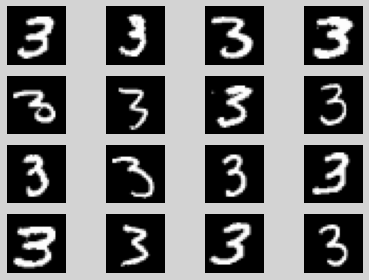

In [47]:
#Oppgave 2a)
plotimgs(train[:,3,:], nplot = 4)

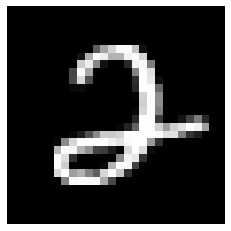

In [31]:
# Plot the second image of the 2 digit
# Note that we have to reshape it to be 28 times 28!
plt.imshow(train[:, 2, 1].reshape((28,28)), cmap = 'gray')
plt.axis('off')
plt.show()

The below code extracts $n = 1000$ datapoints from the training data of a chosen class and stores it in a $(m,n)$ array called `A` that we can for example apply the SVD to.

In [32]:
n = 1000 # Number of datapoints
c = 0 # Class

A = train[:,c,:n]

print(A.shape) # Expect (784,n)

(784, 1000)


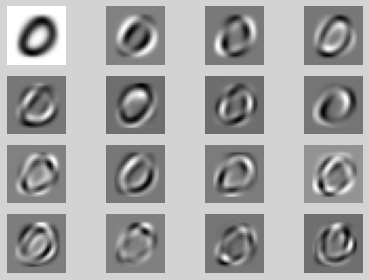

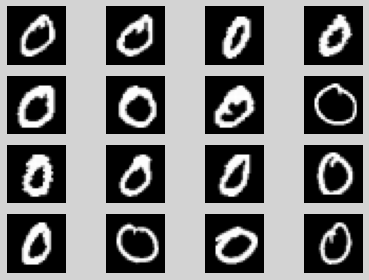

In [33]:
#oppgave 2b)
d = 16
n = 0
A = train[:, n, :]
U, S, Vt = np.linalg.svd(A)
Ud = U[:,:16] #Kun de første 16 kolonnevektorene er med, men trenger ikke å "slice" array for å få de ut, trenger kun å plotte opp til 16 stk
plotimgs(Ud, 4)
plotimgs(A, 4)

#plt.title(f'Logaritmisk plot av singulære verdier', color = 'white')
#plt.ylabel(f'log(S_i)', color = 'white')
#plt.xlabel(f'i', color = 'white')


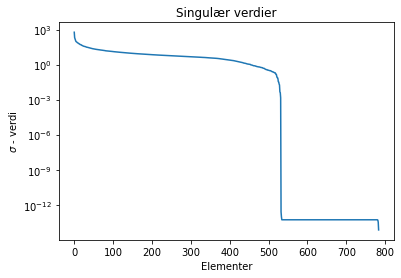

In [34]:
plt.semilogy(S)
plt.xlabel("Elementer")
plt.ylabel(r"$\sigma$ - verdi")
plt.title(r"Singulær verdier")
plt.show()

Her har vi plottet U med d = 16. Vi ser ar basisvektorene får med seg basisegenskapene til tallet, men det er ikke helt tydelig at den representerer tallet 1. Vi ser fra plottet av log(S) så går S mot null relativt fort. Som betyr at vi ikke trenger alle vektorene i U for å representere A godt

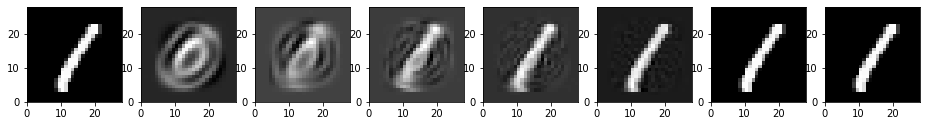

In [35]:
#oppgave 2c
i = 2
col = 0
n = 0
A = train[:, n, :]
U, S, Vt = np.linalg.svd(A)
D = [16, 32, 65, 128, 256, 512, 768]
b = A[:,col]
b_thilde = train[:, 1, :][:,col] 
fig,ax=plt.subplots(nrows = 1,ncols = len(D) +1,figsize=(16,10))
plt.subplot(1,len(D) +1,1)
plt.imshow(b_thilde.reshape((28, 28)), cmap = 'gray', extent = (0,28,0,28))
for d in D:
    W = U[:,:d]
    P_w = orthproj(b_thilde, W)
    plt.subplot(1,len(D) + 1, i)
    plt.imshow(P_w.reshape((28, 28)), cmap = 'gray', extent = (0,28,0,28))
    i+=1


Vi ser at den orthogonale projeksjonen blir bedre og bedre for hver økning av d. Og at den fungerer overraskende godt selv på tall den ikke er trent på 

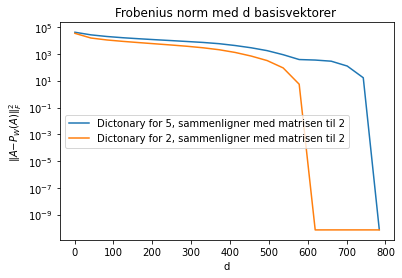

In [36]:
#oppgave 2d 
D = np.linspace(1, 784, 20)
n = 2
col = 1

A = train[:, n, :]
U_trained, S_trained, Vt_trained = np.linalg.svd(A)

B = train[:, 5, :]
U, S, Vt = np.linalg.svd(B)

distance = np.zeros(len(D))
distance_trained = np.zeros(len(D))
i = 0
for d in D: 
    distance_trained[i] = np.sum(columnDistance(A, U_trained[:, :int(d)]))
    distance[i] = np.sum(columnDistance(A, U[:, :int(d)]))
    i+=1

plt.semilogy(D, distance, label = "Dictonary for 5, sammenligner med matrisen til 2")
plt.semilogy(D, distance_trained, label = "Dictonary for 2, sammenligner med matrisen til 2")
plt.xlabel("d")
plt.ylabel(r"$∥ A−P_W (A)∥_F^2$")
plt.title("Frobenius norm med d basisvektorer ")
plt.legend()
plt.show()


23519.856714052523
35354.89797324201
258.21397602908854


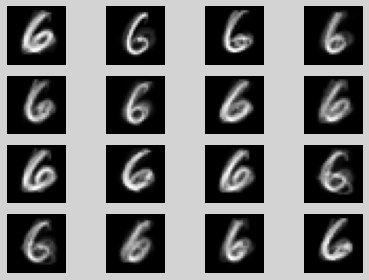

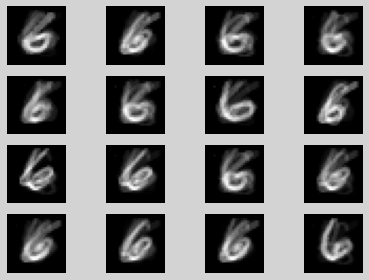

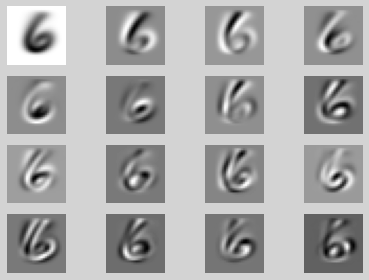

In [37]:
#oppgave 2e 
n = 6
d = 32
delta = 1.0e-10
A = train[:, n, :]
randint = np.random.choice(A.shape[1], d, replace = False) 
W_plus = A[:,randint] #henter ut ønskede kollonner 
U,S,Vt = np.linalg.svd(A)
P_W1, H = nnproj(A, W_plus, 40,delta)
P_W2, H = nnproj(train[:,4,:], W_plus, 40, delta)
print(np.sum(nncolumnDistance(A, W_plus, 40, delta)))
print(np.sum(nncolumnDistance(train[:, 8,:], W_plus, 40, delta)))
print(np.linalg.norm(columnDistance(A, U[:, :16])))

plotimgs(P_W1[:, :16], 4)
plotimgs(P_W2[:, :16], 4)
plotimgs(U[:, :16], 4)

#oppgave 2f 
d = np.logspace(1,3,10, dtype = np.int64)
for i in range(len(d)):
    randint = np.random.choice(A.shape[1], d[i], replace = False)
    W_plus = A[:,randint]
    #P_W, H = nnproj(A, W_plus, 40, 1.0e-10)
    #plotimgs(P_W[:, :16], 4)

<h1> Task 3 </h1>




Below is code that that generates a test set. We then test this function and plot a few datapoints and their corresponding labels.

In [38]:
def generate_test(test, digits = [0,1,2], N = 800):
    """
    Randomly generates test set.
    input:
        test: numpy array. Should be the test data loaded from file
        digits: python list. Contains desired integers
        N: int. Amount of test data for each class
    output:
        test_sub: (784,len(digits)*N) numpy array. Contains len(digits)*N images
        test_labels: (len(digits)*N) numpy array. Contains labels corresponding to the images of test_sub
    """

    assert N <= test.shape[2] , "N needs to be smaller than or equal to the total amount of available test data for each class"

    assert len(digits)<= 10, "List of digits can only contain up to 10 digits"

    # Arrays to store test set and labels
    test_sub = np.zeros((test.shape[0], len(digits)*N))
    test_labels = np.zeros(len(digits)*N)

    # Iterate over all digit classes and store test data and labels
    for i, digit in enumerate(digits):
        test_sub[:, i*N:(i+1)*N] = test[:,digit,:]
        test_labels[i*N:(i+1)*N] = digit

    # Indexes to be shuffled 
    ids = np.arange(0,len(digits)*N)

    # Shuffle indexes
    np.random.shuffle(ids)

    # Return shuffled data 
    return test_sub[:,ids], test_labels[ids]

Test data shape:  (784, 2400)
Test labels shape:  (2400,)
First 16 labels:  [1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2. 0. 1. 2. 1.]


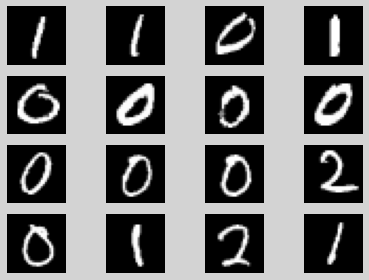

In [39]:
digits = [0,1,2]

A_test, A_labels = generate_test(test, digits = digits, N = 800)
print("Test data shape: ", A_test.shape) # Should be (784,2400)
print("Test labels shape: ", A_labels.shape) # Should be (2400)
print("First 16 labels: ", A_labels[:16])
plotimgs(A_test, nplot = 4)